In [142]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"valentinapruden","key":"744a0251a854ea2b1c75286c77b4d8fd"}'}

##Instalación inicial

In [143]:
# Instalar la librería de Kaggle
!pip install -q kaggle

In [144]:
# Crear un directorio temporal y almacenar allí el archivo con las keys de 
# Kaggle
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [145]:
# Verificar que la API key funciona correctamente listando los kernels de 
# nuestro usuario.
!kaggle kernels list --user valentinapruden --sort-by dateRun
!kaggle competitions download -c examen-2-ap-itba

ref                                                         title                                        author            lastRunTime          totalVotes  
----------------------------------------------------------  -------------------------------------------  ----------------  -------------------  ----------  
valentinapruden/notebookc998cff4cb                          notebookc998cff4cb                           Valentina Pruden  2021-10-23 17:01:40           0  
valentinapruden/exercise-parsing-dates                      Exercise: Parsing Dates                      Valentina Pruden  2021-04-06 16:23:55           0  
valentinapruden/exercise-scaling-and-normalization          Exercise: Scaling and Normalization          Valentina Pruden  2021-04-01 17:25:50           0  
valentinapruden/exercise-handling-missing-values            Exercise: Handling Missing Values            Valentina Pruden  2021-04-01 16:46:07           0  
valentinapruden/exercise-hello-seaborn                    

##Carga de datos

In [149]:
# Verificar que tenemos el dataset 
!ls datos.csv.zip

datos.csv.zip


In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [151]:
df = pd.read_csv("datos.csv.zip")
resultados = pd.read_csv("resultados.csv.zip")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##Analisis inicial

In [152]:
df.dtypes

averageRating           float64
numVotes                  int64
titleType                object
isAdult                 float64
startYear                object
endYear                  object
runtimeMinutes           object
genres_x                 object
directors                object
writers                  object
seasonNumber             object
episodeNumber            object
ordering                float64
language                 object
types                    object
attributes               object
isOriginalTitle         float64
adult                    object
budget                  float64
genres_y                 object
original_language        object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
status                   object
tagline                  object
video                    object
id      

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   averageRating         900000 non-null  float64
 1   numVotes              900000 non-null  int64  
 2   titleType             899998 non-null  object 
 3   isAdult               899998 non-null  float64
 4   startYear             899998 non-null  object 
 5   endYear               899998 non-null  object 
 6   runtimeMinutes        899998 non-null  object 
 7   genres_x              899997 non-null  object 
 8   directors             899998 non-null  object 
 9   writers               899998 non-null  object 
 10  seasonNumber          403675 non-null  object 
 11  episodeNumber         403675 non-null  object 
 12  ordering              341292 non-null  float64
 13  language              341292 non-null  object 
 14  types                 341292 non-null  object 
 15  

In [154]:
contiene_enters = df == '\\N'
cantidad_enters = contiene_enters.sum()
cantidad_enters

averageRating                0
numVotes                     0
titleType                    0
isAdult                      0
startYear                  145
endYear                 873886
runtimeMinutes          237950
genres_x                 17057
directors               135525
writers                 206225
seasonNumber             11119
episodeNumber            11119
ordering                     0
language                339803
types                    59204
attributes              321551
isOriginalTitle              0
adult                        0
budget                       0
genres_y                     0
original_language            0
overview                     0
popularity                   0
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                      0
status                       0
tagline                      0
video                        0
id                           0
dtype: i

In [155]:
def replaceN (df,columna):
  df[columna] = df[columna].str.replace('\\\\N','hola').replace('hola',np.nan)

replaceN(df,'endYear')
replaceN(df,'runtimeMinutes')
replaceN(df,'genres_x')
replaceN(df,'startYear')
replaceN(df,'directors')
replaceN(df,'writers')
replaceN(df,'seasonNumber')
replaceN(df,'episodeNumber')
replaceN(df,'language')
replaceN(df,'types')
replaceN(df,'attributes')

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   averageRating         900000 non-null  float64
 1   numVotes              900000 non-null  int64  
 2   titleType             899998 non-null  object 
 3   isAdult               899998 non-null  float64
 4   startYear             834317 non-null  object 
 5   endYear               26112 non-null   object 
 6   runtimeMinutes        662048 non-null  object 
 7   genres_x              882940 non-null  object 
 8   directors             764473 non-null  object 
 9   writers               693773 non-null  object 
 10  seasonNumber          392556 non-null  object 
 11  episodeNumber         392556 non-null  object 
 12  ordering              341292 non-null  float64
 13  language              1489 non-null    object 
 14  types                 282088 non-null  object 
 15  

In [157]:
missing_values_count = df.isnull().sum()
porcentaje_missings = (missing_values_count/len(df))*100
porcentaje_missings

averageRating            0.000000
numVotes                 0.000000
titleType                0.000222
isAdult                  0.000222
startYear                7.298111
endYear                 97.098667
runtimeMinutes          26.439111
genres_x                 1.895556
directors               15.058556
writers                 22.914111
seasonNumber            56.382667
episodeNumber           56.382667
ordering                62.078667
language                99.834556
types                   68.656889
attributes              97.806556
isOriginalTitle         62.078667
adult                   95.148000
budget                  95.148000
genres_y                95.148000
original_language       95.149444
overview                95.228778
popularity              95.148333
production_companies    95.148333
production_countries    95.148333
release_date            95.155444
revenue                 95.148333
runtime                 95.169111
status                  95.156778
tagline       

In [158]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

62.766


In [159]:
def colsMas95 (df):
  porcentajes = (df.isnull().sum()/len(df))*100
  columnas = porcentajes.keys()
  columnas_drop = []
  
  for columna in columnas:
    if porcentajes[columna] > 95:
      columnas_drop.append(columna)
  return columnas_drop

df = df.drop(columns = colsMas95(df), axis=1)

In [160]:
(df.isnull().sum()/len(df))*100

averageRating       0.000000
numVotes            0.000000
titleType           0.000222
isAdult             0.000222
startYear           7.298111
runtimeMinutes     26.439111
genres_x            1.895556
directors          15.058556
writers            22.914111
seasonNumber       56.382667
episodeNumber      56.382667
ordering           62.078667
types              68.656889
isOriginalTitle    62.078667
id                  0.000000
dtype: float64

#Transformacion de tipos de dato

In [161]:
df['startYear'] = pd.to_numeric(df.startYear,errors='coerce').fillna(0).astype('int16')
df['runtimeMinutes'] = pd.to_numeric(df.runtimeMinutes,errors='coerce')
df['seasonNumber'] = pd.to_numeric(df.seasonNumber,errors='coerce',downcast='integer').fillna(0).astype('int16')
df['episodeNumber'] = pd.to_numeric(df.episodeNumber,errors='coerce',downcast='integer').fillna(0).astype('int16')

In [162]:
resultados['runtimeMinutes'] = pd.to_numeric(resultados.runtimeMinutes,errors='coerce')
resultados['seasonNumber'] = pd.to_numeric(resultados.seasonNumber,errors='coerce',downcast='integer').fillna(0).astype('int16')
resultados['episodeNumber'] = pd.to_numeric(resultados.episodeNumber,errors='coerce',downcast='integer').fillna(0).astype('int16')

# Tratamiento de Missings

## startYear

In [192]:
def get_porc_missing(df,col,tipo_missing):
  if tipo_missing == 0:
    return (len(df[df[col]==0])/len(df))*100
  else:
    return (len(df[df[col].isnull()])/len(df))*100

In [193]:
get_porc_missing(df,'startYear',0)

7.298111111111111

In [194]:
get_porc_missing(resultados,'startYear',np.nan)

0.0

In [195]:
sy_median = df.startYear.median()

[(1875.0, 2022.0)]

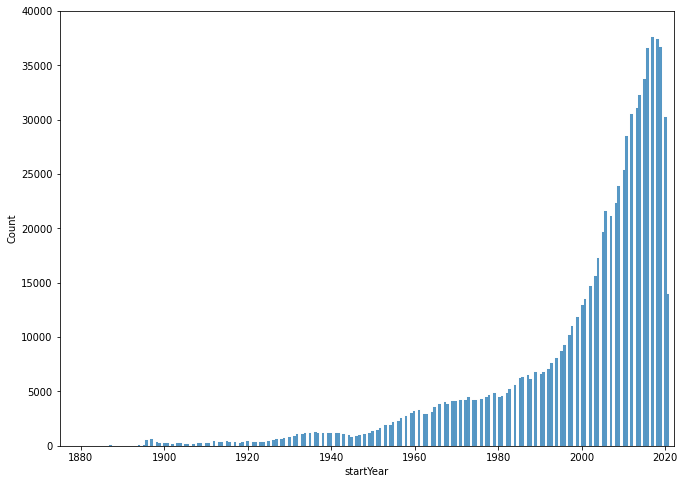

In [196]:
fig, ax = plt.subplots(figsize=(11,8))
ax = sns.histplot(df.startYear)
ax.set(ylim=(0, 40000))
ax.set(xlim=(1875, 2022))

In [197]:
resultados['startYear'] = pd.to_numeric(resultados.startYear,errors='coerce').fillna(sy_median).astype('int16')

Creo una nueva variable: anios_desde_start.

In [198]:
import datetime

df['anios_desde_start'] = datetime.datetime.now().year - df['startYear']
resultados['anios_desde_start'] = datetime.datetime.now().year - resultados['startYear']

##runtimeMinutes

In [199]:
get_porc_missing(df,'runtimeMinutes',np.nan)

0.0

In [200]:
get_porc_missing(resultados,'runtimeMinutes',np.nan)

0.0

In [201]:
df[['runtimeMinutes']].drop_duplicates()

,runtimeMinutes
0,21.0
1,34.0
2,7.0
3,12.0
4,22.0
...,...
883462,1370.0
884105,659.0
893427,2880.0
894160,804.0


[(0.0, 250.0)]

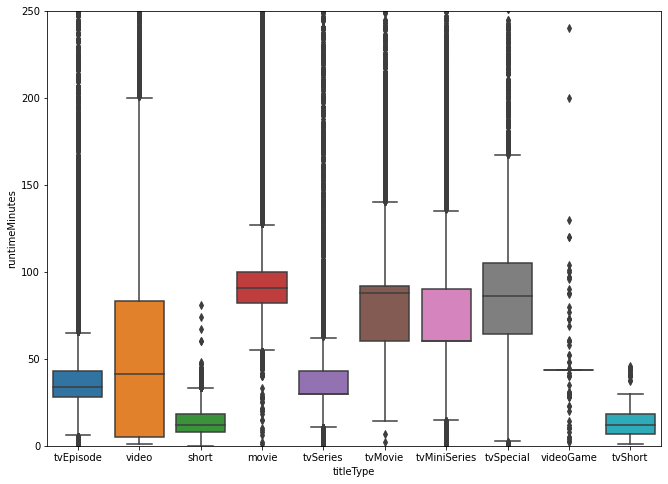

In [202]:
fig, ax = plt.subplots(figsize=(11,8))
ax = sns.boxplot(x="titleType", y="runtimeMinutes", data=df)
ax.set(ylim=(0, 250))

In [203]:
df[df['runtimeMinutes'].isnull()].groupby('titleType')[['id']].count().sort_values(by='id',ascending=False).head()

,id
titleType,


In [204]:
df.groupby('titleType')[['id']].count().sort_values(by='id',ascending=False).head()

,id
titleType,
tvEpisode,403692
movie,217350
short,102830
tvSeries,59710
video,50568


Como voy a llenar la variable runtimeMinutes a partir de titleType, debo asegurarme de que en la ultima no haya nulos.





In [205]:
get_porc_missing(df,'titleType',np.nan)

0.0

In [206]:
get_porc_missing(resultados,'titleType',np.nan)

0.0

In [207]:
# reemplazo los nulos con el tipo mas frecuente
df['titleType'] = df['titleType'].fillna('tvEpisode')
resultados['titleType'] = resultados['titleType'].fillna('tvEpisode')

In [208]:
medianas_ttype = df[['titleType','runtimeMinutes']].groupby(['titleType']).median()
medianas_dict = medianas_ttype.runtimeMinutes.to_dict()

#df['medias_titleType'] = df['titleType'].map(medianas_dict)
df['runtimeMinutes'] = df['runtimeMinutes'].fillna(df['titleType'].map(medianas_dict))

In [209]:
resultados['runtimeMinutes'] = resultados['runtimeMinutes'].fillna(resultados['titleType'].map(medianas_dict))

##titleType

Las filas con titleType nulo las reemplace antes.

In [210]:
df[['titleType']].drop_duplicates()

,titleType
0,tvEpisode
2,video
3,short
7,movie
15,tvSeries
25,tvMovie
63,tvMiniSeries
108,tvSpecial
264,videoGame
740,tvShort


In [211]:
# los tvEpisodes son los unicos que tienen seasonNumber y episodeNumber
df[(df['seasonNumber'] != 0) & (df['episodeNumber']!=0)][['titleType']].drop_duplicates()

,titleType
0,tvEpisode


In [212]:
ttype_count = df.groupby('titleType')[['id']].count().sort_values(by = 'id',ascending=False)
ttype_count

,id
titleType,
tvEpisode,403692
movie,217350
short,102830
tvSeries,59710
video,50568
tvMovie,36964
videoGame,9944
tvMiniSeries,9091
tvSpecial,8124


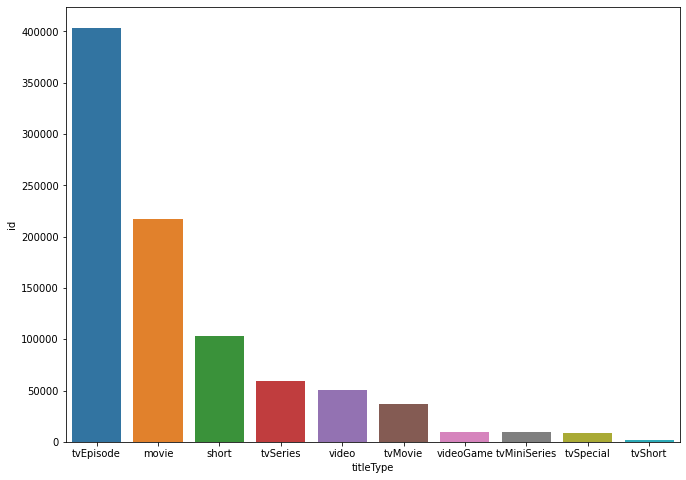

In [213]:
fig, ax = plt.subplots(figsize=(11,8))
ax = sns.barplot(x=ttype_count.index, y="id", data=ttype_count)

In [214]:
df.groupby('titleType')[['averageRating']].mean().sort_values(by = 'averageRating',ascending=False)

,averageRating
titleType,
tvEpisode,7.392151
tvMiniSeries,7.088109
videoGame,7.019660
tvShort,6.855646
tvSeries,6.802765
short,6.781752
tvSpecial,6.759183
tvMovie,6.611189
video,6.568889


[(4.0, 10.0)]

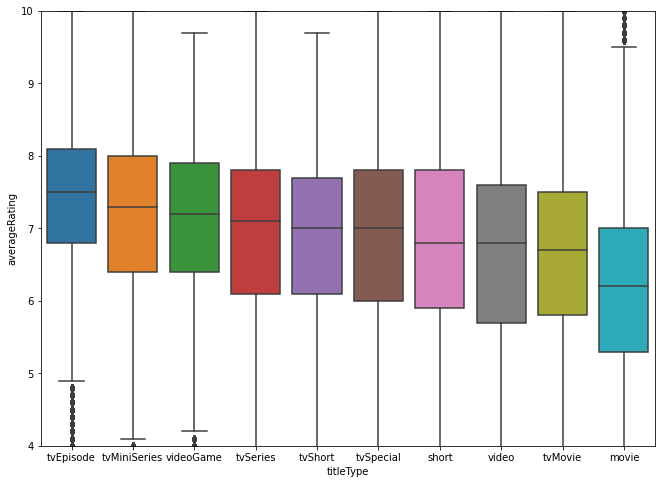

In [215]:
mi_orden = df.groupby('titleType')[['averageRating']].median().sort_values(by = 'averageRating',ascending=False).index.tolist()

fig, ax = plt.subplots(figsize=(11,8))
ax = sns.boxplot(x="titleType", y="averageRating", data=df, order = mi_orden)
ax.set(ylim=(4, 10))

In [216]:
df['es_serie'] = np.where(df['titleType'].isin(['tvEpisode','tvMiniSeries','tvSeries']),1,0)

In [217]:
resultados['es_serie'] = np.where(resultados['titleType'].isin(['tvEpisode','tvMiniSeries','tvSeries']),1,0)

In [218]:
df[['titleType','es_serie']].head()

,titleType,es_serie
0,tvEpisode,1
1,tvEpisode,1
2,video,0
3,short,0
4,tvEpisode,1


[(0.0, 12.0)]

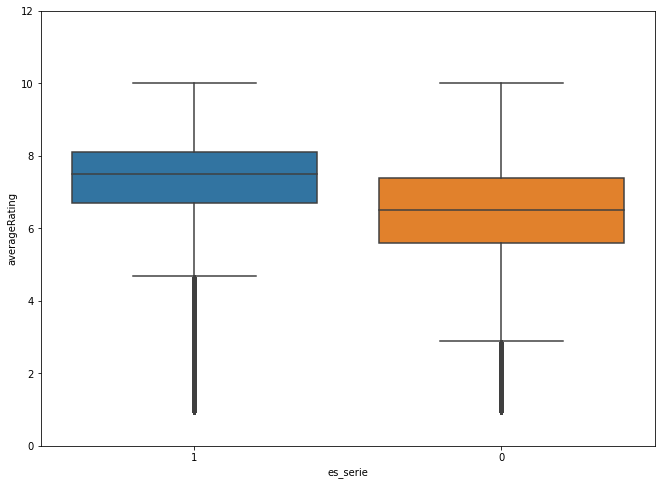

In [219]:
mi_orden = df.groupby('es_serie')[['averageRating']].median().sort_values(by = 'averageRating',ascending=False).index.tolist()

fig, ax = plt.subplots(figsize=(11,8))
ax = sns.boxplot(x="es_serie", y="averageRating", data=df, order = mi_orden)
ax.set(ylim=(0, 12))

##genres

In [220]:
get_porc_missing(df,'genres_x',np.nan)

1.8955555555555554

In [221]:
get_porc_missing(resultados,'genres_x',np.nan)

0.0012424984158145198

In [222]:
df[df['genres_x'].isnull()]

,averageRating,numVotes,titleType,isAdult,startYear,runtimeMinutes,genres_x,directors,writers,seasonNumber,episodeNumber,ordering,types,isOriginalTitle,id,anios_desde_start,es_serie
21,8.0,5,tvEpisode,0.0,2016,34.0,NaN,nm3006224,NaN,2,1,NaN,NaN,NaN,22,5,1
36,5.4,11,tvMovie,0.0,1984,85.0,NaN,nm0342160,"nm0304698,nm0342160,nm0894523",0,0,NaN,NaN,NaN,37,37,0
116,4.7,13,movie,0.0,1923,59.0,NaN,nm0919976,nm0178126,0,0,NaN,NaN,NaN,117,98,0
139,7.0,7,tvSeries,0.0,2009,30.0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,140,12,1
300,7.6,5,tvEpisode,0.0,2010,34.0,NaN,NaN,NaN,1,4,NaN,NaN,NaN,301,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899780,5.9,10,movie,0.0,1946,91.0,NaN,nm0439290,nm0439290,0,0,NaN,NaN,NaN,899781,75,0
899791,8.2,8,tvEpisode,0.0,2020,34.0,NaN,nm0450428,nm3961640,0,0,NaN,NaN,NaN,899792,1,1
899863,7.8,11,tvSpecial,0.0,1989,86.0,NaN,nm0589495,nm0525701,0,0,2.0,imdbDisplay,0.0,899864,32,0
899903,7.4,39,movie,0.0,1998,79.0,NaN,"nm0365098,nm0734287",NaN,0,0,3.0,imdbDisplay,0.0,899904,23,0


In [223]:
genres = df[df['genres_x'].notnull()].genres_x.tolist()
join_genres = ','.join(genres)
generos = set(join_genres.split(","))

In [224]:
#convierto los generos en columnas

generos_dummy = df['genres_x'].str.get_dummies(sep=',')
#df_dummy = df.copy()

In [225]:
generos_dummy.sum().sort_values(ascending=False)

Drama          294517
Comedy         280068
Short          119865
Action         109233
Documentary    106962
Animation      101027
Adventure       95062
Crime           91277
Romance         66899
Family          65819
Music           43180
Reality-TV      42545
Mystery         41731
Horror          39161
Fantasy         37625
Thriller        36788
Talk-Show       27064
Sci-Fi          25511
History         23009
Biography       17895
Game-Show       17075
Sport           16789
Adult           16356
Western         12082
News            12013
War             10030
Musical          9361
Film-Noir         977
dtype: int64

In [226]:
def splitDataFrameList(df,target_column,separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [227]:
df['genres_x'] = df['genres_x'].astype('str')
df_gen_stack = splitDataFrameList(df[['titleType','genres_x','averageRating','numVotes']],'genres_x',",")

In [228]:
df_gen_stack['ranking'] = df_gen_stack['averageRating']*df_gen_stack['numVotes']

In [229]:
gen_avg_rat = df_gen_stack.groupby('genres_x')[['averageRating']].mean().sort_values(by='averageRating',ascending=False)
gen_avg_rat.head()

,averageRating
genres_x,
History,7.338455
Documentary,7.224429
Biography,7.151098
Mystery,7.121258
Crime,7.112280


[(4.0, 10.0)]

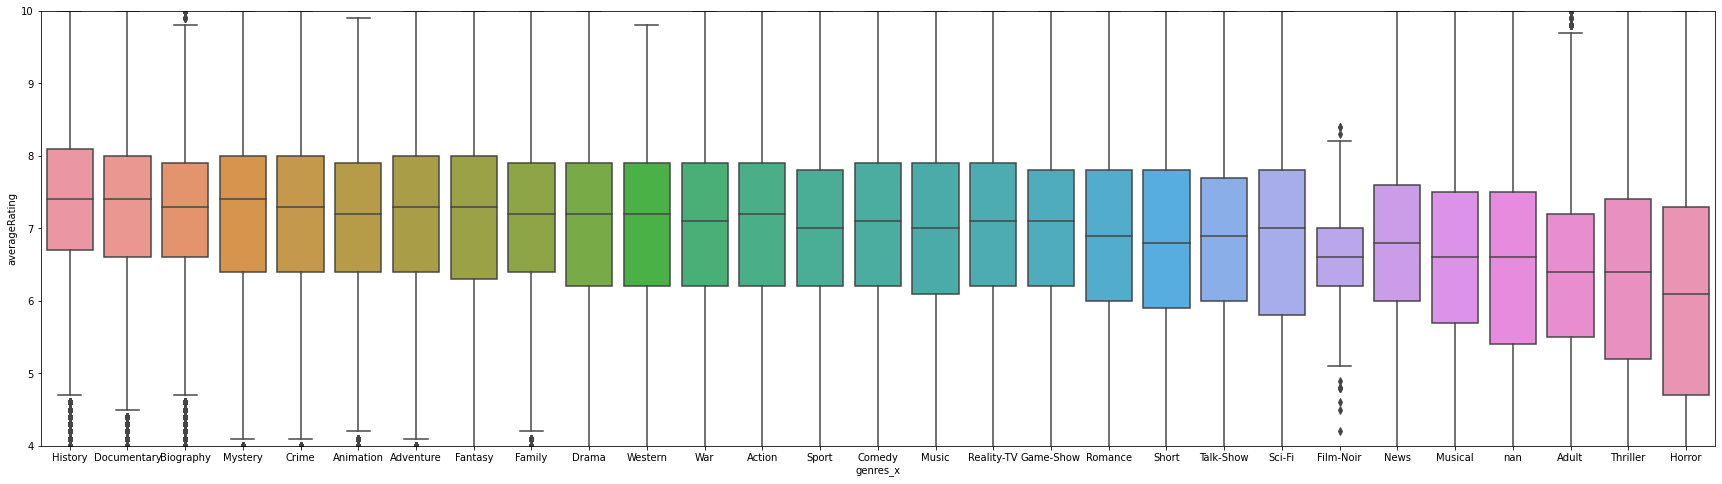

In [230]:
mi_orden = gen_avg_rat.index.tolist()

fig, ax = plt.subplots(figsize=(30,8))
ax = sns.boxplot(x="genres_x", y="averageRating", data=df_gen_stack, order = mi_orden)
ax.set(ylim=(4, 10))

In [231]:
genYtipo_top_ranking = df_gen_stack.groupby(['titleType','genres_x'])[['ranking']].mean().sort_values(by='ranking',ascending=False).reset_index()
genYtipo_top_ranking.head()

,titleType,genres_x,ranking
0,movie,Sci-Fi,246507.448603
1,movie,Adventure,200615.814459
2,movie,Fantasy,154082.199402
3,movie,Animation,145938.462557
4,movie,Action,145112.101436


In [232]:
# para hacer una agrupacion de generos de acuerdo a la cantidad de votos de cada uno
gen_cant_votos = df_gen_stack.groupby('genres_x')[['numVotes']].sum().sort_values(by='numVotes',ascending=False)
gen_cant_votos.head()

,numVotes
genres_x,
Drama,642802602
Action,569632034
Adventure,491603545
Comedy,408106829
Crime,258198817


In [233]:
#aux = df[['averageRating']].merge(generos_dummy,left_index=True, right_index=True)

#for genero in generos_dummy.columns:
#  aux[genero] = np.where(aux[genero] == 1, aux['averageRating'], np.nan)

In [234]:
#a = aux.drop(columns = ['averageRating']).mean().sort_values(ascending = False)
#a = pd.DataFrame(a).reset_index()
#a.columns = ['genero','averageRating']
#a

In [235]:
gen_top = genYtipo_top_ranking['genres_x'].tolist()
tipo_top = ['movie']
df['tiene_buen_ranking'] = np.where((df['genres_x'].isin(gen_top)) & (df['titleType'].isin(tipo_top)) , 1, 0)
resultados['tiene_buen_ranking'] = np.where((resultados['genres_x'].isin(gen_top)) & (resultados['titleType'].isin(tipo_top)) , 1, 0)

La variable tiene_buen_ranking indica si una pelicula,episodio,etc tiene un alto averageRating*numVotos. Tiene sentido que los registros con buen ranking tengan un averageRating mas bajo, ya que su buen ranking se debe a la alta cantidad de votos. Mientras mas votos tenga, mas probable es que el rating promedio baje.

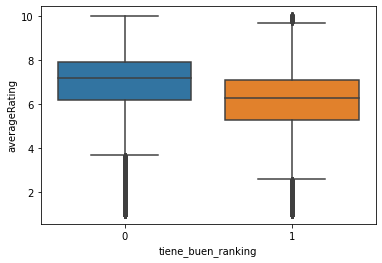

In [236]:
ax = sns.boxplot(x="tiene_buen_ranking", y="averageRating", data=df)

In [237]:
generos_interes = ['Drama','Comedy','Short','Action','Documentary']
generos_dummy = generos_dummy[generos_interes]

In [238]:
for genero in generos_interes:
  resultados[genero] = np.where(resultados['genres_x'].str.find(genero)!=-1,1,0)

In [239]:
#df_con_dummies = df.merge(generos_dummy, left_index=True, right_index=True).drop(columns = ['genres_x'],axis=1).copy()

In [240]:
df[(df['genres_x'].str.find('Drama')!=-1) & (df['genres_x'].notnull())]

,averageRating,numVotes,titleType,isAdult,startYear,runtimeMinutes,genres_x,directors,writers,seasonNumber,episodeNumber,ordering,types,isOriginalTitle,id,anios_desde_start,es_serie,tiene_buen_ranking
5,6.6,5,tvEpisode,0.0,1986,50.0,"Comedy,Crime,Drama",nm0857280,"nm0302825,nm0384386,nm0821601",1,12,NaN,NaN,NaN,6,35,1,0
8,5.9,219,short,0.0,2002,15.0,"Drama,Romance,Short",nm1210547,nm1210547,0,0,NaN,NaN,NaN,9,19,0,0
10,7.9,619,tvEpisode,0.0,2010,28.0,"Comedy,Drama",nm0638354,"nm0254120,nm1718886,nm1861274,nm3275453",7,7,NaN,NaN,NaN,11,11,1,0
15,8.4,2814,tvSeries,0.0,1971,60.0,Drama,"nm0650240,nm0388338,nm0071713,nm0047688,nm0936...","nm0789477,nm0666875,nm0370058,nm0803100,nm0919...",0,0,15.0,imdbDisplay,0.0,16,50,1,0
16,7.6,21,tvEpisode,0.0,1994,25.0,"Comedy,Drama,Family",nm0573732,"nm0528480,nm0513516,nm4046499,nm4046047",1,6,NaN,NaN,NaN,17,27,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899990,7.0,111,movie,0.0,1963,107.0,Drama,nm0620205,"nm1021538,nm0442704",0,0,NaN,NaN,NaN,899991,58,0,1
899991,7.8,165,tvEpisode,0.0,2013,54.0,"Crime,Drama,Mystery",nm0699114,"nm1161980,nm0010984,nm1131770",1,6,NaN,NaN,NaN,899992,8,1,0
899993,7.4,455,tvEpisode,0.0,2021,42.0,"Crime,Drama,Mystery",nm0867127,"nm0005082,nm11353819,nm3080233,nm5518269",1,6,1.0,NaN,0.0,899994,0,1,0
899994,4.7,7,movie,0.0,1971,83.0,Drama,nm0477483,nm0287566,0,0,NaN,NaN,NaN,899995,50,0,1


In [241]:
df['Horror'] = np.where(df['genres_x'].str.find('Horror')!=-1,1,0)
resultados['Horror'] = np.where(resultados['genres_x'].str.find('Horror')!=-1,1,0)

df['Family'] = np.where(df['genres_x'].str.find('Family')!=-1,1,0)
resultados['Family'] = np.where(resultados['genres_x'].str.find('Family')!=-1,1,0)

##directors & writers

In [242]:
directors = df[df['directors'].notnull()].directors.tolist()
join_directors = ','.join(directors)
directors = set(join_directors.split(","))
len(directors)

215500

In [243]:
writers = df[df['writers'].notnull()].writers.tolist()
join_writers = ','.join(writers)
writers = set(join_writers.split(","))
len(writers)

326973

In [244]:
df['directors'] = df['directors'].astype('str')
df_dir_stack = splitDataFrameList(df[['directors','averageRating','numVotes']],'directors',",")

In [245]:
df['writers'] = df['writers'].astype('str')
df_wri_stack = splitDataFrameList(df[['writers','averageRating','numVotes']],'writers',",")

In [246]:
dir_numVotes_mean = df_dir_stack.groupby('directors')[['numVotes']].mean().round().sort_values(by='numVotes',ascending=False)
dir_numVotes_mean.head()

,numVotes
directors,
nm0634240,1374022.0
nm0418362,882675.0
nm0021249,600398.0
nm0001392,587345.0
nm0000116,567464.0


In [247]:
dir_averageRating_mean = df_dir_stack.groupby('directors')[['averageRating']].mean().sort_values(by='averageRating',ascending=False)
dir_ratYvot = dir_averageRating_mean.merge(dir_numVotes_mean,left_index=True, right_index=True).sort_values(by='numVotes',ascending = False)
dir_ratYvot.head()

,averageRating,numVotes
directors,,
nm0634240,8.246429,1374022.0
nm0418362,8.200000,882675.0
nm0021249,7.680000,600398.0
nm0001392,7.731818,587345.0
nm0000116,7.577778,567464.0


In [248]:
#tomo aprox el 2% de los directores
dir_95 = np.percentile(dir_numVotes_mean['numVotes'], 98.3,interpolation = 'midpoint')
dir_95

9812.5

In [249]:
dirs_mas_votados = dir_numVotes_mean[dir_numVotes_mean['numVotes'] > dir_95].index.tolist()
dirs_rat_mas8 = dir_averageRating_mean[dir_averageRating_mean['averageRating'] > 8].index.tolist()

intersection_set = set.intersection(set(dirs_mas_votados), set(dirs_rat_mas8))
intersection_list = list(intersection_set)
len(intersection_list)

472

In [250]:
df['dir_popular'] = np.where(df['directors'].isin(intersection_list),1,0)
resultados['dir_popular'] = np.where(resultados['directors'].isin(intersection_list),1,0)

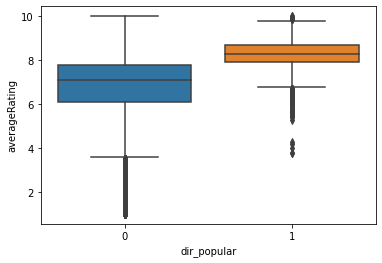

In [251]:
ax = sns.boxplot(x="dir_popular", y="averageRating", data=df)

In [252]:
dir_averageRating_count = df_dir_stack.groupby('directors')[['averageRating']].count().sort_values(by='averageRating',ascending=False)
dir_averageRating_count.head()

,averageRating
directors,
nan,135527
nm1337210,2133
nm0665889,902
nm0360253,895
nm3766090,889


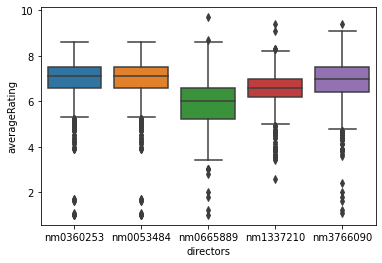

In [253]:
directores_top = dir_averageRating_count[1:6].index.tolist()
ax = sns.boxplot(x="directors", y="averageRating", data=df_dir_stack[df_dir_stack['directors'].isin(directores_top)])

(0.0, 400.0)

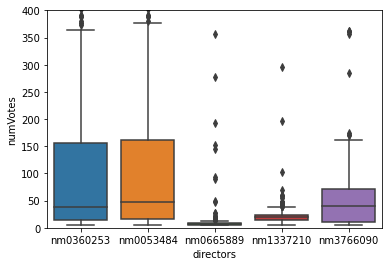

In [254]:
ax = sns.boxplot(x="directors", y="numVotes", data=df_dir_stack[df_dir_stack['directors'].isin(directores_top)])
plt.ylim([0,400])

In [255]:
def label_race (row, col):
    lab = {
        f[0]: 100,
        f[1]: 80,
        f[2]: 60,
        f[3]: 40,
        f[4]: 20,
    }
    return lab.get(row[col], 0)

In [256]:
f=directores_top
df['director_f'] = df.apply(lambda row: label_race(row,'directors'), axis=1)
resultados['director_f'] = resultados.apply(lambda row: label_race(row,'directors'), axis=1)

In [257]:
wri_averageRating_count = df_wri_stack.groupby('writers')[['averageRating']].count().sort_values(by='averageRating',ascending=False)
wri_averageRating_count.head()

,averageRating
writers,
nan,206227
nm0829537,3042
nm0935540,2929
nm0810431,2923
nm0170306,2244


In [258]:
writers_top = dir_averageRating_count[1:6].index.tolist()
writers_top

['nm1337210', 'nm0665889', 'nm0360253', 'nm3766090', 'nm0053484']

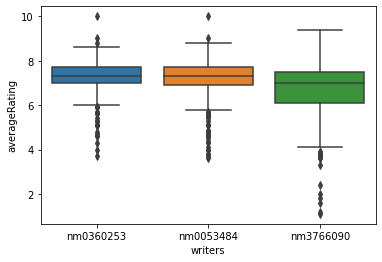

In [259]:
ax = sns.boxplot(x="writers", y="averageRating", data=df_wri_stack[df_wri_stack['writers'].isin(writers_top)])

In [260]:
f=writers_top
df['writers_f'] = df.apply (lambda row: label_race(row,'writers'), axis=1)
resultados['writers_f'] = resultados.apply (lambda row: label_race(row,'writers'), axis=1)

In [261]:
df['directors']=np.where(df['directors']=='nan',np.nan,df['directors'])
df['writers']=np.where(df['writers']=='nan',np.nan,df['writers'])

##seasonNumber & episodeNumber

In [262]:
df[df['seasonNumber'].notnull()][['titleType']].drop_duplicates()

,titleType
0,tvEpisode
2,video
3,short
7,movie
15,tvSeries
25,tvMovie
63,tvMiniSeries
108,tvSpecial
264,videoGame
740,tvShort


In [263]:
df[df['seasonNumber'].isnull()][['id']].count()

id    0
dtype: int64

In [264]:
df[df['episodeNumber'].notnull()][['titleType']].drop_duplicates()

,titleType
0,tvEpisode
2,video
3,short
7,movie
15,tvSeries
25,tvMovie
63,tvMiniSeries
108,tvSpecial
264,videoGame
740,tvShort


In [265]:
df[df['episodeNumber'].isnull()][['id']].count()

id    0
dtype: int64

In [266]:
df[(df['seasonNumber'].isnull()) & (df['titleType']=='tvEpisode')]

,averageRating,numVotes,titleType,isAdult,startYear,runtimeMinutes,genres_x,directors,writers,seasonNumber,episodeNumber,ordering,types,isOriginalTitle,id,anios_desde_start,es_serie,tiene_buen_ranking,Horror,Family,dir_popular,director_f,writers_f


##types

In [267]:
get_porc_missing(df,'types',np.nan)

68.65688888888889

In [268]:
types_count = df.groupby('types')[['id']].count().sort_values(by='id',ascending=False)
types_top=types_count[0:5].index.tolist()
types_count.head()

,id
types,
imdbDisplay,258502
working,12372
alternative,6520
dvd,1733
video,1542


In [269]:
df.groupby('types')[['averageRating']].mean().sort_values(by='averageRating',ascending=False).head()

,averageRating
types,
imdbDisplay,6.765153
festival,6.591225
festivalworking,6.300000
working,6.054704
alternative,6.046181


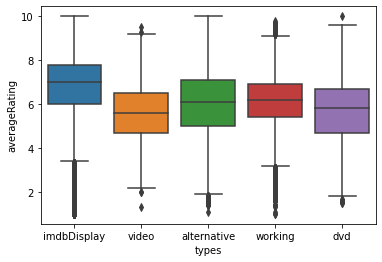

In [270]:
ax = sns.boxplot(x="types", y="averageRating", data=df[df['types'].isin(types_top)])

In [271]:
f=types_top
df['types_f'] = df.apply(lambda row: label_race(row,'types'), axis=1)

In [272]:
df.groupby('isOriginalTitle',dropna=False)[['id']].count()

,id
isOriginalTitle,
0.0,341286
1.0,6
NaN,558708


##isAdult

In [273]:
get_porc_missing(df,'isAdult',np.nan)

0.0002222222222222222

In [274]:
get_porc_missing(resultados,'isAdult',np.nan)

0.0009318738118608899

In [275]:
df.groupby('isAdult')[['id']].count()

,id
isAdult,
0.0,883096
1.0,16901
2020.0,1


In [276]:
resultados['isAdult'] = resultados['isAdult'].fillna(0)

# Outliers

In [277]:
def datosOutliers(df,columna):
  aux = df[df[columna].notnull()]
  q1 = np.percentile(aux[columna], 25,interpolation = 'midpoint')
  q3 = np.percentile(aux[columna], 75,interpolation = 'midpoint')
  iqr = q3 - q1
  return [q1,q3,iqr]

In [278]:
vars_num = df.select_dtypes(exclude = 'object').drop(columns = 'id').columns
datos_cols = {key: None for key in vars_num}

for columna in vars_num:

    datos = {'q1': datosOutliers(df,columna)[0],
             'q3': datosOutliers(df,columna)[1],
             'iqr': datosOutliers(df,columna)[2]
    }

    datos_cols[columna]=datos

    q1 = datos['q1']
    q3 = datos['q3']
    iqr = datos['iqr']

    #print('\n\n',columna,": ",datos)

    upper = q3+1.5*iqr
    datos['upper'] = upper
    #print("Upper bound:",upper)
    
    lower = q1-1.5*iqr
    datos['lower'] = lower
    #print("Lower bound:", lower)

    outliers = df[(df[columna] > upper) | (df[columna] < lower)][columna]
    datos['outliers'] = list(outliers)
    #print(columna,": \n\n",outliers)

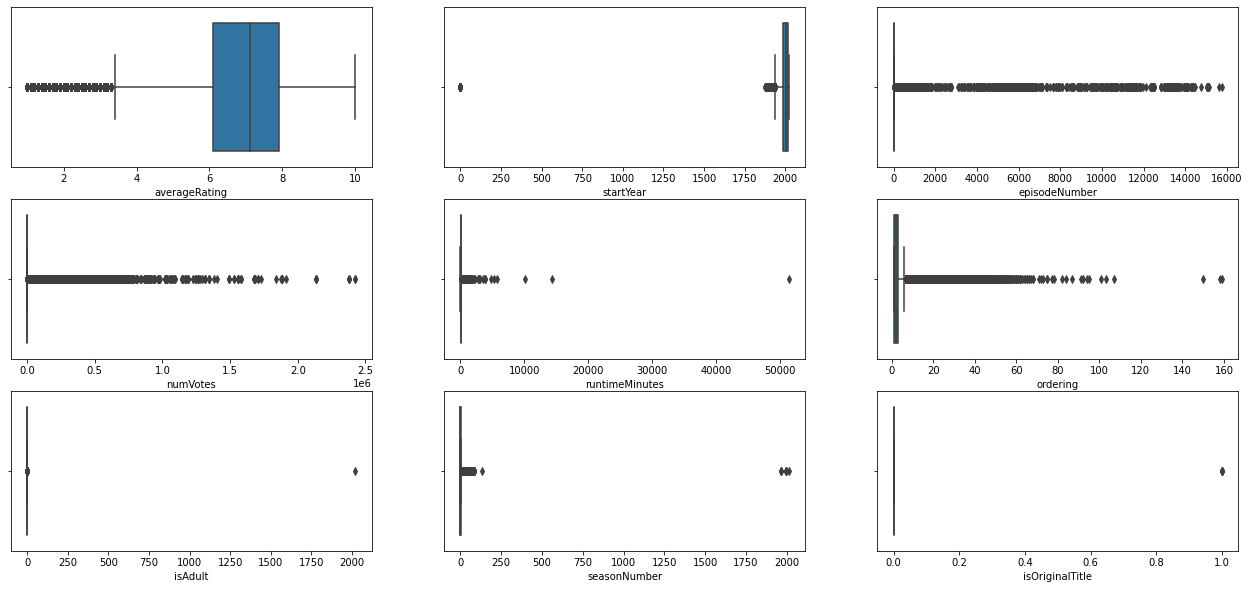

In [279]:
fig, axs = plt.subplots(3,3, figsize=(22, 10))

sns.boxplot(x=df["averageRating"],ax=axs[0,0])
sns.boxplot(x=df["numVotes"],ax=axs[1,0])
sns.boxplot(x=df["isAdult"],ax=axs[2,0])
sns.boxplot(x=df["startYear"],ax=axs[0,1])
sns.boxplot(x=df["runtimeMinutes"],ax=axs[1,1])
sns.boxplot(x=df["seasonNumber"],ax=axs[2,1])
sns.boxplot(x=df["episodeNumber"],ax=axs[0,2])
sns.boxplot(x=df["ordering"],ax=axs[1,2])
sns.boxplot(x=df["isOriginalTitle"],ax=axs[2,2])

plt.show()

###numVotes

In [280]:
# tiene un upper bound demasiado acotado
datos_cols['numVotes']['upper']

216.5

###seasonNumber

In [281]:
df[df['seasonNumber']>15].sort_values(by='seasonNumber',ascending=False).head(10)

,averageRating,numVotes,titleType,isAdult,startYear,runtimeMinutes,genres_x,directors,writers,seasonNumber,episodeNumber,ordering,types,isOriginalTitle,id,anios_desde_start,es_serie,tiene_buen_ranking,Horror,Family,dir_popular,director_f,writers_f,types_f
868009,8.0,51,tvEpisode,0.0,2008,60.0,"Biography,Documentary",NaN,nm3002597,2012,2,2.0,imdbDisplay,0.0,868010,13,1,0,0,0,0,0,0,100
162392,7.6,5,tvEpisode,0.0,0,28.0,"Animation,Comedy,Documentary",nm0536160,NaN,1996,162,NaN,NaN,NaN,162393,2021,1,0,0,0,0,0,0,0
442865,6.4,19,tvEpisode,0.0,1996,28.0,"Animation,Comedy,Documentary",nm0609741,nm0609741,1996,155,NaN,NaN,NaN,442866,25,1,0,0,0,0,0,0,0
479950,7.0,6,tvEpisode,0.0,1996,24.0,"Animation,Comedy,Documentary",nm0486188,"nm0486188,nm0663064",1996,161,NaN,NaN,NaN,479951,25,1,0,0,0,0,0,0,0
764515,7.3,21,tvEpisode,0.0,1995,28.0,"Animation,Comedy,Documentary","nm1123085,nm0609741","nm3359987,nm0609741",1995,114,NaN,NaN,NaN,764516,26,1,0,0,0,0,0,0,0
842835,5.8,97,tvEpisode,0.0,1994,27.0,"Animation,Comedy,Documentary",nm0637615,nm0637615,1994,74,NaN,NaN,NaN,842836,27,1,0,0,0,0,0,0,0
456474,8.2,7,tvEpisode,0.0,1967,60.0,"Documentary,History",nm0806293,nm0637498,1967,2,1.0,imdbDisplay,0.0,456475,54,1,0,0,0,0,0,0,100
690835,8.3,8,tvEpisode,0.0,1966,60.0,"Documentary,History",nm0422444,nm0637498,1966,1,2.0,imdbDisplay,0.0,690836,55,1,0,0,0,0,0,0,100
321788,6.6,17,tvEpisode,0.0,1965,60.0,"Documentary,History",nm0281310,nm0281310,1965,2,2.0,imdbDisplay,0.0,321789,56,1,0,0,0,0,0,0,100
528525,8.3,8,tvEpisode,0.0,2017,21.0,Reality-TV,NaN,NaN,135,2,1.0,imdbDisplay,0.0,528526,4,1,0,0,0,0,0,0,100


In [282]:
df = df.drop(df[df['seasonNumber']>=1965].index)

In [283]:
df['genres_x'] = df['genres_x'].astype('str')
df_genres_stack = splitDataFrameList(df[['genres_x','seasonNumber','averageRating']],'genres_x',",")

In [284]:
genres_count=df_genres_stack.groupby('genres_x')[['averageRating']].count().sort_values(by='averageRating',ascending=False).head()
genres_count

,averageRating
genres_x,
Drama,294517
Comedy,280063
Short,119865
Action,109233
Documentary,106953


In [285]:
df_genres_stack.groupby('genres_x')[['seasonNumber']].max().sort_values(by='seasonNumber',ascending=False).head()

,seasonNumber
genres_x,
Reality-TV,135
Game-Show,82
Sport,77
Documentary,69
News,69


In [286]:
df[df['genres_x'].notnull()].groupby(['genres_x','directors','writers'])[['averageRating']].count()

averageRating
genres_x directors                     writers                                                 
Action   nm0000247                     nm0393250,nm0000247                                    1
         nm0000647                     nm0457048                                              1
         nm0000647,nm0939202           nm0570226,nm0305413,nm0666806                          1
         nm0001092                     nm0357326,nm1323785,nm0001092                          1
         nm0001206                     nm0343419                                              1
...                                                                                         ...
nan      nm9913311                     nm9913311                                              1
         nm9925048,nm10386911          nm9486622,nm9925048,nm11235350,nm11361170              1
         nm9926246,nm9231217,nm4869802 nm0131387,nm5233193                                    1
         nm9951743                     nm9951743                                              1
         nm9970819                     nm9970821,nm9970820                                    1

[495628 rows x 1 columns]

###startYear

In [287]:
min(datos_cols['startYear']['outliers'])

0

In [288]:
#https://headsup.scoutlife.org/what-was-the-first-movie-ever-made/
df[df['startYear']==1874]

,averageRating,numVotes,titleType,isAdult,startYear,runtimeMinutes,genres_x,directors,writers,seasonNumber,episodeNumber,ordering,types,isOriginalTitle,id,anios_desde_start,es_serie,tiene_buen_ranking,Horror,Family,dir_popular,director_f,writers_f,types_f
69603,6.9,1431,short,0.0,1874,1.0,"Documentary,Short",nm1715062,NaN,0,0,5.0,imdbDisplay,0.0,69604,147,0,0,0,0,0,0,0,100


###episodeNumber

In [289]:
datos_cols['episodeNumber']['outliers']
df[df['episodeNumber']>1000]

,averageRating,numVotes,titleType,isAdult,startYear,runtimeMinutes,genres_x,directors,writers,seasonNumber,episodeNumber,ordering,types,isOriginalTitle,id,anios_desde_start,es_serie,tiene_buen_ranking,Horror,Family,dir_popular,director_f,writers_f,types_f
168,8.4,6,tvEpisode,0.0,2008,34.0,"Drama,Romance",NaN,nm2183823,1,5398,NaN,NaN,NaN,169,13,1,0,0,0,0,0,0,0
1048,8.0,5,tvEpisode,0.0,2013,28.0,"Drama,Romance",nm0705249,nm1035004,1,5762,NaN,NaN,NaN,1049,8,1,0,0,0,0,0,0,0
1632,9.4,5,tvEpisode,0.0,2019,34.0,"Crime,Drama,Romance",nm0526389,"nm0022935,nm9436004,nm1250889,nm3601736,nm1014...",1,14362,NaN,NaN,NaN,1633,2,1,0,0,0,0,0,0,0
1961,7.7,7,tvEpisode,0.0,2015,28.0,"Drama,Romance",nm0636616,"nm3464219,nm5939618",1,6121,NaN,NaN,NaN,1962,6,1,0,0,0,0,0,0,0
2813,5.4,5,tvEpisode,0.0,2018,34.0,"Drama,Romance",NaN,nm0027442,1,13405,NaN,NaN,NaN,2814,3,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899115,5.9,108,tvEpisode,0.0,2018,89.0,"Crime,Drama,Mystery",nm0092115,nm0092115,1,1074,NaN,NaN,NaN,899116,3,1,0,0,0,0,0,0,0
899318,7.4,8,tvEpisode,0.0,2013,34.0,"Comedy,Family","nm10631312,nm4027968,nm11741397","nm5378778,nm2097520,nm4029150,nm2814611,nm4030057",1,1072,NaN,NaN,NaN,899319,8,1,0,0,1,0,0,0,0
899390,6.8,5,tvEpisode,0.0,2015,28.0,"Drama,Romance",nm0071776,"nm5939618,nm0680304",1,6203,NaN,NaN,NaN,899391,6,1,0,0,0,0,0,0,0
899420,7.6,10,tvEpisode,0.0,2013,34.0,"Comedy,Family","nm10631312,nm4027968,nm11741397","nm5378778,nm2097520,nm4029150,nm2814611,nm4030057",1,1046,NaN,NaN,NaN,899421,8,1,0,0,1,0,0,0,0


###isAdult

In [290]:
df.groupby('isAdult')[['id']].count()

,id
isAdult,
0.0,883087
1.0,16901
2020.0,1


In [291]:
# hay un outlier = 2020 en isAdult 
df.isAdult.replace(2020,0)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
899995    0.0
899996    0.0
899997    0.0
899998    0.0
899999    0.0
Name: isAdult, Length: 899991, dtype: float64

#Modelo

##Split dataset

In [292]:
df_con_dummies = df.merge(generos_dummy, left_index=True, right_index=True).drop(columns = ['genres_x'],axis=1)
df_con_dummies = df_con_dummies[['averageRating','numVotes','isAdult','startYear','runtimeMinutes','seasonNumber',
                                 'episodeNumber','es_serie','director_f','writers_f',
                                 'Drama','Comedy','Short','Action','Documentary','Horror','Family','tiene_buen_ranking','dir_popular','anios_desde_start']]

In [293]:
resultados_con_dummies = resultados[['numVotes','isAdult','startYear','runtimeMinutes','seasonNumber',
                                 'episodeNumber','es_serie','director_f','writers_f',
                                 'Drama','Comedy','Short','Action','Documentary','Horror','Family','id','tiene_buen_ranking','dir_popular','anios_desde_start']].copy()

In [294]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [295]:
# Separo en train y test
# Let's say we want to split the data in 80:20 for train:valid:test dataset
#train_size=0.6

X = df_con_dummies.loc[:, df_con_dummies.columns != 'averageRating'].copy()
y = df_con_dummies['averageRating']

# In the first step we will split the data in training and remaining dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7)

print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(629993, 19)
(629993,)
(269998, 19)
(269998,)


(None, None)

##Selección de variables

In [296]:
cols_iniciales = ['numVotes','runtimeMinutes','seasonNumber','dir_popular','es_serie',
                  'tiene_buen_ranking','Horror','Family','anios_desde_start']

#['numVotes','isAdult','startYear','runtimeMinutes','seasonNumber','episodeNumber','corto','movie','serie','director_f','writers_f',
#'Drama','Comedy','Short','Action','Documentary','id','tiene_buen_ranking','dir_popular']

In [297]:
X_train=np.array(X_train[cols_iniciales])

In [298]:
X_test = np.array(X_test[cols_iniciales]) 

##ExtraTreesRegressor

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
fila = []

for i in range(25,35,2):
  print(i)
  regr2 = ExtraTreesRegressor(max_depth=i)
  fregr2 = regr2.fit(X_train,y_train)
  r2_train = fregr2.score(X_train, y_train)
  r2_test = fregr2.score(X_test, y_test)
  fila.append([i,r2_train,r2_test])
  #print(f'criterion: {c} - max_depth: {i} => r2_train: {r2_train} - r2_test: {r2_test}')

25
27
29
31
33


In [ ]:
scores_profundidad = pd.DataFrame(fila, columns=["max_depth","r2_train","r2_test"])
scores_profundidad

,max_depth,r2_train,r2_test
0,25,0.370079,0.273740
1,27,0.425444,0.280341
2,29,0.492795,0.283349
3,31,0.560493,0.280733
4,33,0.621197,0.270176


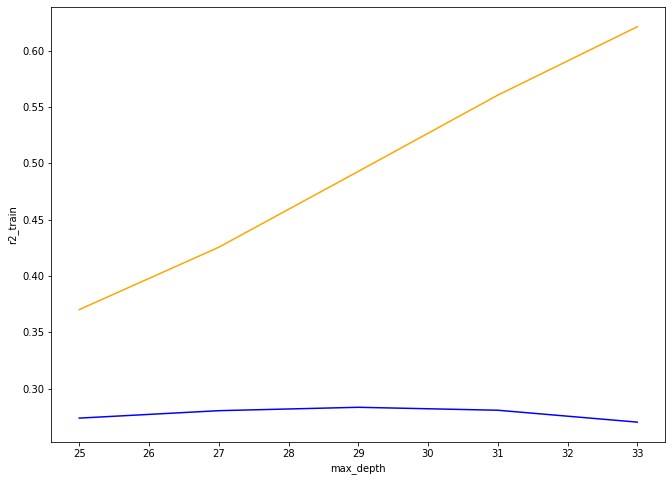

In [ ]:
fig, ax = plt.subplots(figsize=(11,8))
ax = sns.lineplot(data=scores_profundidad, x="max_depth", y="r2_train", color = 'orange')
ax = sns.lineplot(data=scores_profundidad, x="max_depth", y="r2_test", color = 'blue')

In [ ]:
fila2 = []

for i in range(155,171,5):
  regr2 = ExtraTreesRegressor(max_depth=29,n_estimators=i,random_state=42)
  fregr2 = regr2.fit(X_train,y_train)

  r2_train = fregr2.score(X_train, y_train)
  r2_test = fregr2.score(X_test, y_test)
  fila2.append([i,r2_train,r2_test])
  print(f'n_estimators: {i} => r2_train: {r2_train} - r2_test: {r2_test}')

max_depth: 155 => r2_train: 0.4932189350399403 - r2_test: 0.28533311512921
max_depth: 160 => r2_train: 0.4929193997603156 - r2_test: 0.2853480226707866
max_depth: 165 => r2_train: 0.4939143276232835 - r2_test: 0.2852070970246936
max_depth: 170 => r2_train: 0.4937992262720495 - r2_test: 0.2851726206737507


In [ ]:
scores_n_estimators = pd.DataFrame(fila2, columns=["n_estimators","r2_train","r2_test"])
scores_n_estimators

,n_estimators,r2_train,r2_test
0,155,0.493219,0.285333
1,160,0.492919,0.285348
2,165,0.493914,0.285207
3,170,0.493799,0.285173


In [ ]:
regr2 = ExtraTreesRegressor(max_depth=29,n_estimators=160,random_state=42,bootstrap=True)
fregr2 = regr2.fit(X_train,y_train)

In [ ]:
fregr2.score(X_train, y_train)

0.4753892194566829

In [ ]:
fregr2.score(X_test, y_test)

0.28836215168891444

In [ ]:
importances = []
for i in range(len(cols_iniciales)):
  importances.append([cols_iniciales[i], fregr2.feature_importances_[i]])

importances = pd.DataFrame(importances, columns=["feature", "importance"])
importances.sort_values(by='importance',ascending = False)

,feature,importance
0,numVotes,0.262511
1,runtimeMinutes,0.217143
4,es_serie,0.214505
8,anios_desde_start,0.198615
2,seasonNumber,0.055128
6,Horror,0.033241
5,tiene_buen_ranking,0.012304
3,dir_popular,0.003386
7,Family,0.003166


##RandomForestRegressor

In [303]:
fila3 = []

for i in range(17,24,2):
  print(i)
  regr3 = RandomForestRegressor(max_depth=i,random_state=42)
  fregr3 = regr3.fit(X_train,y_train)
  r2_train = fregr3.score(X_train, y_train)
  r2_test = fregr3.score(X_test, y_test)
  fila3.append([i,r2_train,r2_test])
  #print(f'criterion: {c} - max_depth: {i} => r2_train: {r2_train} - r2_test: {r2_test}')

17
19
21
23


In [304]:
scores_profundidad2 = pd.DataFrame(fila3, columns=["max_depth","r2_train","r2_test"])
scores_profundidad2

,max_depth,r2_train,r2_test
0,17,0.395445,0.292791
1,19,0.456813,0.293463
2,21,0.517869,0.285982
3,23,0.570267,0.272521


In [307]:
fila4 = []

for i in range(155,171,5):
  regr2 = RandomForestRegressor(max_depth=19,n_estimators=i,random_state=42)
  fregr2 = regr2.fit(X_train,y_train)

  r2_train = fregr2.score(X_train, y_train)
  r2_test = fregr2.score(X_test, y_test)
  fila4.append([i,r2_train,r2_test])
  print(f'n_estimators: {i} => r2_train: {r2_train} - r2_test: {r2_test}')

n_estimators: 155 => r2_train: 0.4574015524960548 - r2_test: 0.2940077043151397
n_estimators: 160 => r2_train: 0.45742952867542225 - r2_test: 0.2940138274432823
n_estimators: 165 => r2_train: 0.45740405977223725 - r2_test: 0.2940199182276213
n_estimators: 170 => r2_train: 0.45743032548050805 - r2_test: 0.2940152256759553


In [308]:
scores_n_estimators2 = pd.DataFrame(fila4, columns=["n_estimators","r2_train","r2_test"])
scores_n_estimators2

,n_estimators,r2_train,r2_test
0,155,0.457402,0.294008
1,160,0.457430,0.294014
2,165,0.457404,0.294020
3,170,0.457430,0.294015


In [311]:
rf_optimo = RandomForestRegressor(max_depth=19,n_estimators=165,random_state=42)
rf_optimo = regr2.fit(X_train,y_train)

##BaggingRegressor

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
bag_dt = BaggingRegressor(n_estimators=100, random_state=42)

In [ ]:
bag_dt.fit(X_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=100,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [ ]:
bag_dt.score(X_train,y_train)

0.5464154282080771

In [ ]:
bag_dt.score(X_test,y_test)

0.13491592887845427

In [ ]:
bagBoot_dt = BaggingRegressor(bootstrap_features=True, random_state=42)

###Ajuste de hiperparámetros

In [ ]:
estimator_range = [1] + list(range(10,150,20))

scores = []

for estimator in estimator_range:
  bag_dt = BaggingRegressor(n_estimators=estimator, random_state = 0)
  bag_dt.fit(X_train, y_train)
  scores.append(bag_dt.score(X_test,y_test))

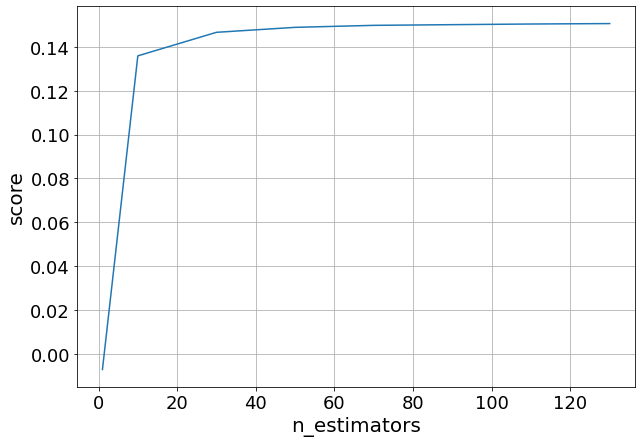

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(estimator_range,scores)

plt.xlabel('n_estimators',fontsize=20)
plt.ylabel('score',fontsize=20)
plt.tick_params(labelsize=18)
plt.grid()

##Salida

In [ ]:
pred = fregr2.predict(resultados_con_dummies[cols_iniciales])

In [ ]:
# Finalmente generar un CSV con los resultados aplicados al CSV de resultados que no contiene la columna target

salida = pd.DataFrame(data={"averageRating": pred}).astype(str)
salida.index = resultados_con_dummies.id
salida.to_csv("extraTrees.csv", sep=',',index=True,  index_label='id')

In [312]:
pred_rf = rf_optimo.predict(resultados_con_dummies[cols_iniciales])

In [313]:
# Finalmente generar un CSV con los resultados aplicados al CSV de resultados que no contiene la columna target

salida = pd.DataFrame(data={"averageRating": pred_rf}).astype(str)
salida.index = resultados_con_dummies.id
salida.to_csv("randomForest.csv", sep=',',index=True,  index_label='id')